In [ ]:
#A neural networks is similar a function, have inputs and return an output
#Work trhoughs layers
#The input layers must be equal at the number of input
#Output layer equal as classes looking to predict for
#The sum of the layer values are equal to 1, like a probablility distribution
#Hidden layers, between input and output, them are conected each other layers through weights
#Densely connected neural network its connected to every node from the previous layer
#The weights are what the neural network is going to change and optimize to determine the mapping
#The values of the weights are generally 0,1 but can be negative or large,it depends of the working model
#These are the trainable parameters that the neural network will actually tweak and change as we train to get the best possible result
#Biases, the bias exist on a previous layer that it afffects, doesnt take any input information, is just some constan numeric value
#Bias always have value of 1
#How to get the values of the nodes, with a weighted sum
#N1 = EWiXi+b  -> Wx(2)+Wy(2)+Wz(2)+b (bias) = return some value V
#The model starts with random weight and bias values, need to be trained to get a better results
#Activation Function apply to each neuron to "clear" the node value before passes to the next layer
#N1 = F(EWiXi+b) -> Sigmud (N1w0+N2w1+b) = [0,1]
#The type of the activation function depends on what are you looking for in the output value
#Introduce activation functions to the model allows to make more complex predictions
#Move the output through higher R or dimension allows to determinate superior predictions
#Give the expected output, and compared the output value, then modify the model
#Loss function -> calculated how far away was the output from the expected value
#The higher the value, thw worse our network was, need to tweak the model, precisely the values of the weights and bias
#Looking for the global minimun of the loss function, the least possible loss-> create a better model
#Gradient descent, direction to move the function to get this global minimun
#The the algorithm brought backpropagation will go backwards through the netwokr and update the weights and values to move to that direction



In [1]:
#Dataset

%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

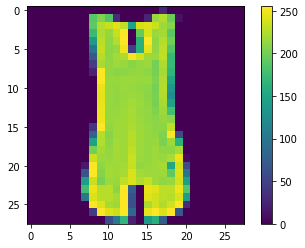

In [10]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Data preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0

In [19]:
#Building the model

#Define the amount of neurons in each layer, and their activation function
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1), take the shape and flat all the pixel and flatten it out
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2), dense->all the previous neurons are connected to every neuron on this layer, 128 neurons
    keras.layers.Dense(10, activation='softmax') # output layer (3), many neurons as classes to predict for, softmax values between zero and one
])

#Optimizer based in the loss function, can modify this values, its called hyper parameter tuning to look different perfomance
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training 
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

In [39]:
#Testing
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) #verbose how much information are we seeing as this model evaluates

print('Test accuracy:', test_acc) #when the test accuracy is lower than the compile accuracy its overfeeding the model, because it started to just kind of memorize the data and get good at seeint That data
#Want the highest accuracy possible on new data

313/313 [==============================] - 2s 5ms/step - loss: 0.3411 - accuracy: 0.8831
Test accuracy: 0.8830999732017517


313/313 [==============================] - 1s 2ms/step
Ankle boot


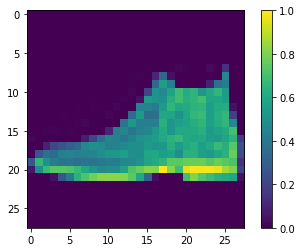

In [40]:
#Make predictions
predictions = model.predict(test_images) #is better predict with many objects
predictions[0] #show the probability distribution for the classes
print(class_names[np.argmax(predictions[0])])
np.argmax(predictions[0]) #show the highest value, means the classes of the image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



Pick a number: 654
1/1 [==============================] - 0s 33ms/step
Excpected: Sandal
Guess: Sandal


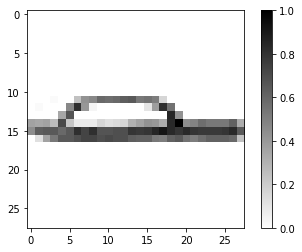

In [43]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print("Excpected: " + label)
  print("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

